# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99764., 100031.,  99982.,  99959.,  99502., 100575.,  99870.,
        100017.,  99702., 100598.]),
 array([ 1.0000466 , 10.90003585, 20.8000251 , 30.70001434, 40.60000359,
        50.49999284, 60.39998209, 70.29997133, 80.19996058, 90.09994983,
        99.99993907]),
 <a list of 10 Patch objects>)

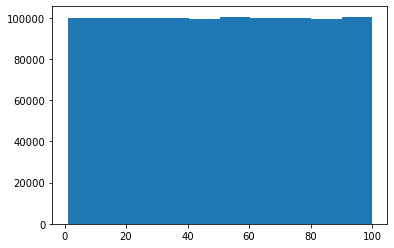

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(1000000)

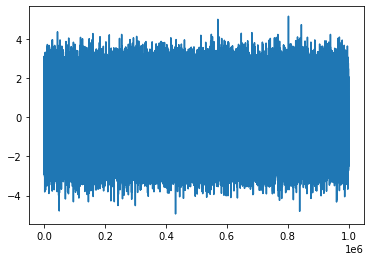

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([4.20000e+01, 1.68300e+03, 2.65910e+04, 1.56806e+05, 3.60264e+05,
        3.24155e+05, 1.13945e+05, 1.57210e+04, 7.80000e+02, 1.30000e+01]),
 array([-4.93997768, -3.9292217 , -2.91846571, -1.90770973, -0.89695375,
         0.11380223,  1.12455821,  2.1353142 ,  3.14607018,  4.15682616,
         5.16758214]),
 <a list of 10 Patch objects>)

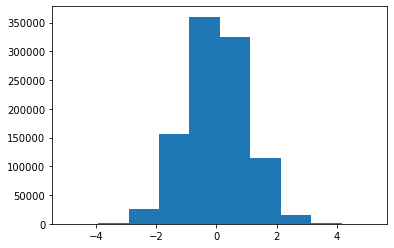

In [6]:
%matplotlib inline
plt.hist(data)

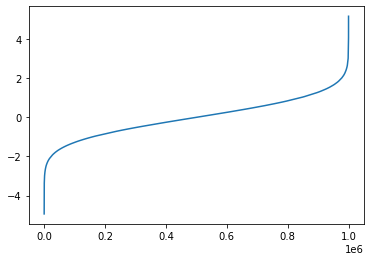

In [7]:
plt.plot(x,sorted(data))

(array([  32.,  200.,  913., 2112., 2951., 2402., 1063.,  280.,   43.,
           4.]),
 array([-3.30520945, -1.39045135,  0.52430675,  2.43906485,  4.35382295,
         6.26858105,  8.18333915, 10.09809726, 12.01285536, 13.92761346,
        15.84237156]),
 <a list of 10 Patch objects>)

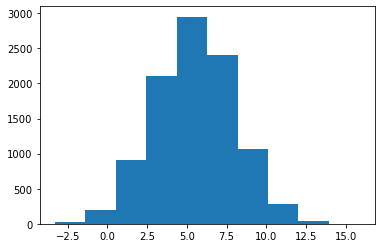

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[-0.0534504 ,  0.8173103 , -0.55068065,  0.58178539],
       [-1.65781049,  0.47223598, -0.82067417,  0.31781367]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1433999999999993


(3.1433999999999993, [<matplotlib.lines.Line2D at 0x2263ca4c880>])

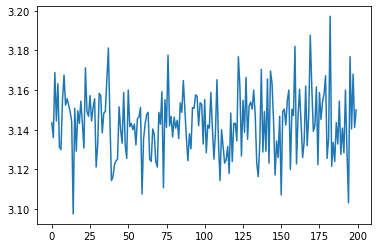

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [12]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000135,1.499293,18.494069
std,0.999733,2.500146,7.797397
min,-4.463461,-10.772725,5.000035
25%,-0.674669,-0.185245,11.742567
50%,0.001187,1.500521,18.485640
75%,0.676048,3.185268,25.255295
max,4.831602,13.101840,31.999991


(array([1.88000e+02, 4.31800e+03, 4.24490e+04, 1.81252e+05, 3.44252e+05,
        2.94754e+05, 1.12566e+05, 1.87570e+04, 1.42600e+03, 3.80000e+01]),
 array([-4.46346125, -3.53395495, -2.60444864, -1.67494234, -0.74543604,
         0.18407026,  1.11357656,  2.04308286,  2.97258917,  3.90209547,
         4.83160177]),
 <a list of 10 Patch objects>)

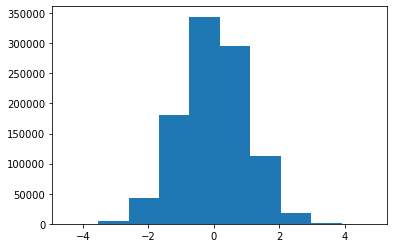

In [14]:
plt.hist(data["A"])

(array([2.90000e+01, 1.33300e+03, 1.91720e+04, 1.17766e+05, 3.08026e+05,
        3.48272e+05, 1.67595e+05, 3.46980e+04, 2.98800e+03, 1.21000e+02]),
 array([-10.77272462,  -8.38526818,  -5.99781173,  -3.61035529,
         -1.22289884,   1.1645576 ,   3.55201404,   5.93947049,
          8.32692693,  10.71438338,  13.10183982]),
 <a list of 10 Patch objects>)

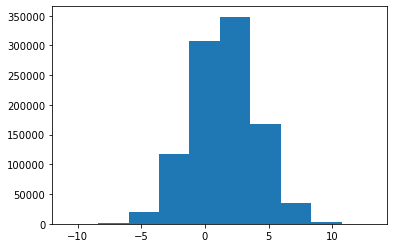

In [15]:
plt.hist(data["B"])

(array([100237., 100278.,  99720.,  99950., 100327., 100015.,  99383.,
         99966., 100287.,  99837.]),
 array([ 5.00003491,  7.70003049, 10.40002607, 13.10002165, 15.80001723,
        18.50001281, 21.20000839, 23.90000397, 26.59999955, 29.29999514,
        31.99999072]),
 <a list of 10 Patch objects>)

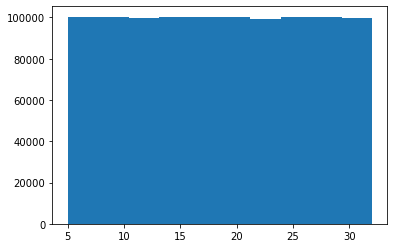

In [16]:
plt.hist(data["C"])

In [17]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist()

In [20]:
a = len(colum_names)
a

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [22]:
new_data

,Column Name,A,B
42,State,-0.480215,0.495325
43,Account Length,-0.907093,0.651312
44,Area Code,0.496393,0.985922
45,Phone,0.318886,0.196070
46,Int'l Plan,-1.740867,0.953984
47,VMail Plan,0.667425,0.786848
48,VMail Message,-0.386352,0.290936
49,Day Mins,-0.990883,0.461685
50,Day Calls,-0.339026,0.858604
51,Day Charge,-0.178778,0.483090
